<a href="https://colab.research.google.com/github/oscaredumurguia/Simulab/blob/main/Segundo_proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calculación de Precipitación

---


Tomando como idea lo que vimos en clase vamos a usar el método montecarlo con los datos de los últimas lluvias que han habido en Mexico para poder calcular si la probabilidad de lluvias tenga una precipitación diaria de 4mm por día de , esto mediante el método montecarlo. Esto en Guadalajara.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from sklearn.preprocessing import KBinsDiscretizer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ruta='/content/drive/MyDrive/Colab Notebooks/'
archivo='POWER_Regional_Monthly_2014_2024.csv'
df_lluvias = pd.read_csv(ruta + archivo, sep=',', header=9) # Set header to line 10 (0-indexed 9) to correctly identify column names

# Drop the 'PARAMETER' column as it contains non-numeric descriptive text
df_lluvias.drop(columns=['PARAMETER'], inplace=True)

# Convert relevant columns to numeric, coercing errors to NaN
# Assuming 'YEAR', 'LAT', 'LON', 'JAN' through 'DEC', and 'ANN' should be numeric
numeric_cols = ['YEAR', 'LAT', 'LON', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANN']
for col in numeric_cols:
    df_lluvias[col] = pd.to_numeric(df_lluvias[col], errors='coerce')

print("DataFrame Head after dropping 'PARAMETER' and converting to numeric:")
print(df_lluvias.head())
print("\nDataFrame Column dtypes:")
print(df_lluvias.dtypes)

DataFrame Head after dropping 'PARAMETER' and converting to numeric:
   YEAR   LAT      LON   JAN   FEB  MAR   APR   MAY   JUN   JUL   AUG   SEP  \
0  2014  18.0 -100.000  0.08  0.01  0.0  0.10  4.03  5.97  3.85  6.81  9.00   
1  2014  18.0 -100.625  0.15  0.00  0.0  0.04  2.98  4.71  2.60  5.84  7.37   
2  2014  18.0 -101.250  0.23  0.00  0.0  0.01  2.81  4.73  1.97  3.77  5.88   
3  2014  18.0 -101.875  0.23  0.00  0.0  0.00  3.00  4.53  1.79  3.33  5.71   
4  2014  18.0 -102.500  0.20  0.14  0.0  0.02  4.06  6.13  3.10  3.92  6.82   

    OCT   NOV   DEC   ANN  
0  4.43  0.68  0.56  2.97  
1  4.01  0.63  0.78  2.44  
2  4.27  1.03  0.77  2.13  
3  4.51  1.01  0.73  2.08  
4  4.71  1.45  0.58  2.60  

DataFrame Column dtypes:
YEAR      int64
LAT     float64
LON     float64
JAN     float64
FEB     float64
MAR     float64
APR     float64
MAY     float64
JUN     float64
JUL     float64
AUG     float64
SEP     float64
OCT     float64
NOV     float64
DEC     float64
ANN     float64
dtype:

Se tomaron datos de 2014 a 2024  para poder tener los datos anteriores y completar una simulación montecarlo.

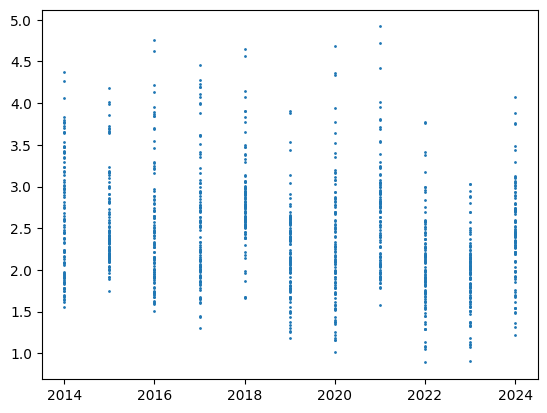

In [ ]:
plt.scatter(df_lluvias['YEAR'], df_lluvias['ANN'], s=1)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (13) found smaller than n_clusters (20). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


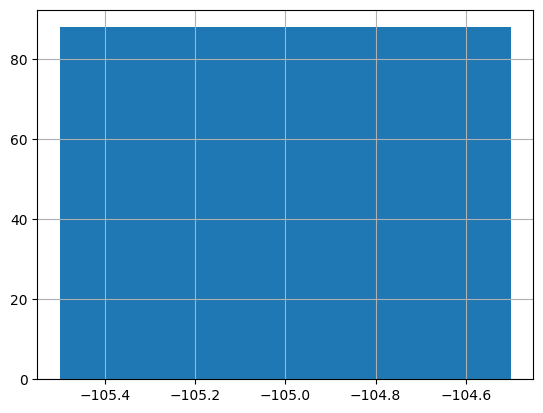

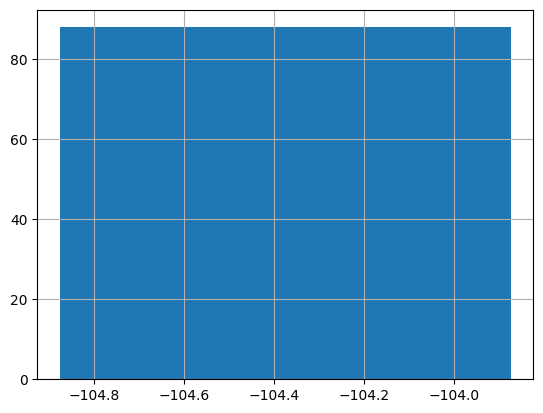

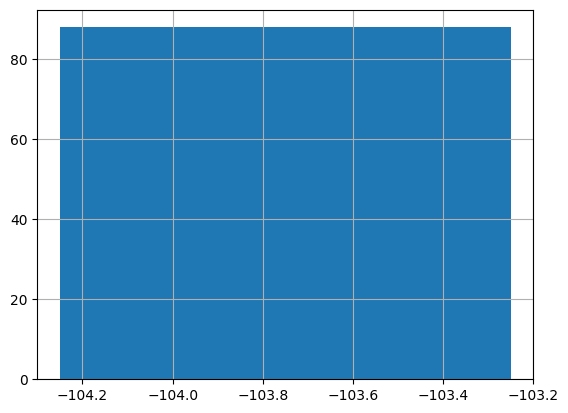

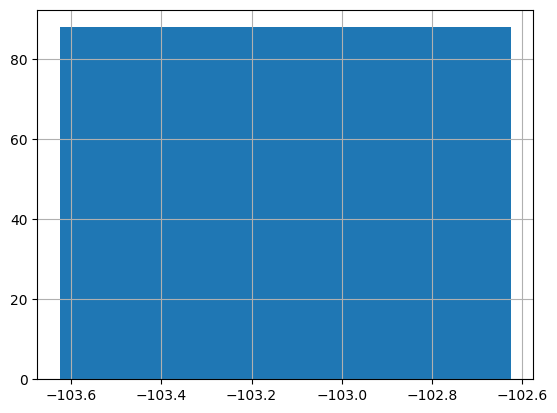

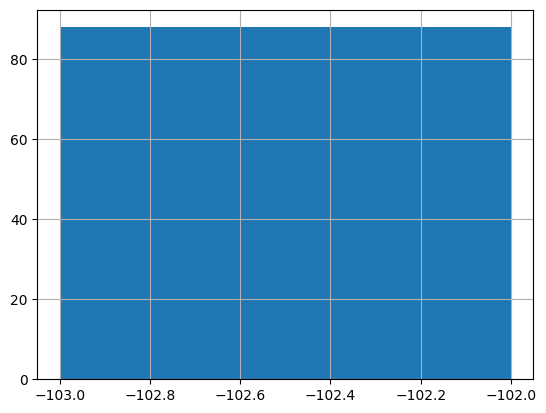

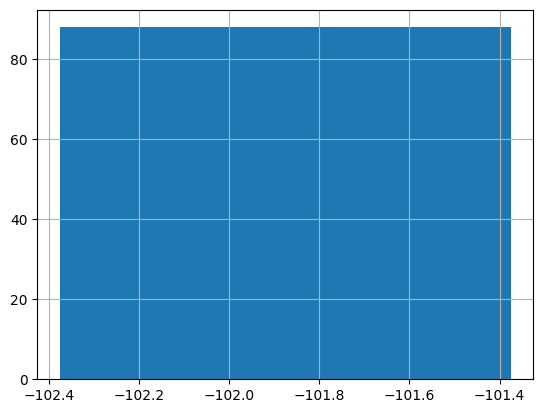

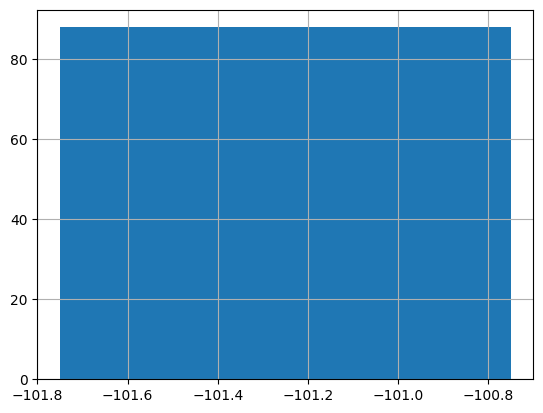

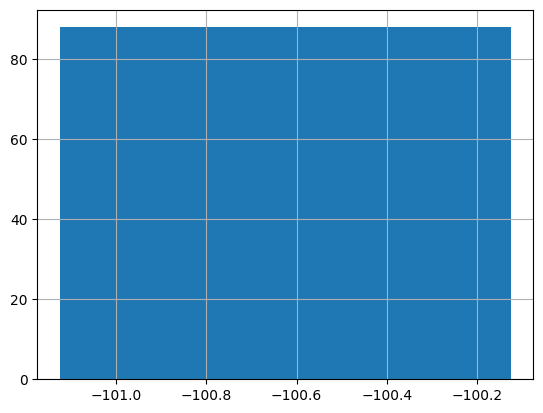

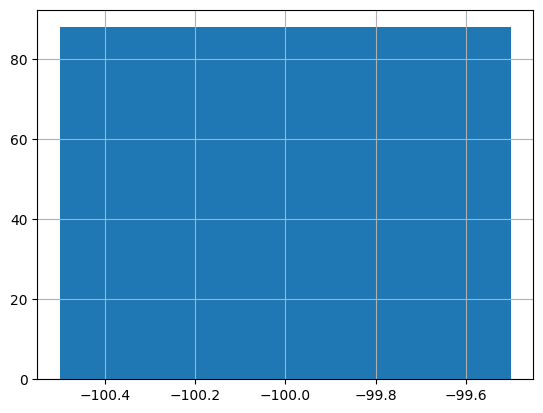

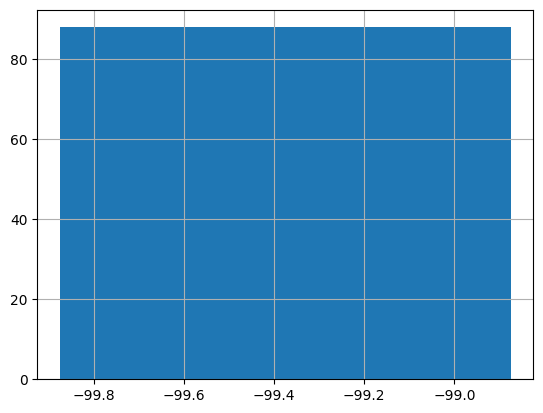

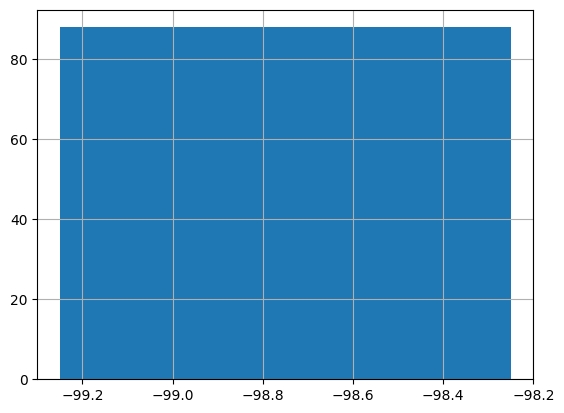

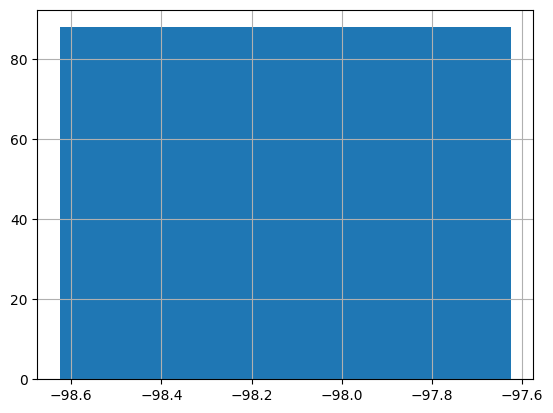

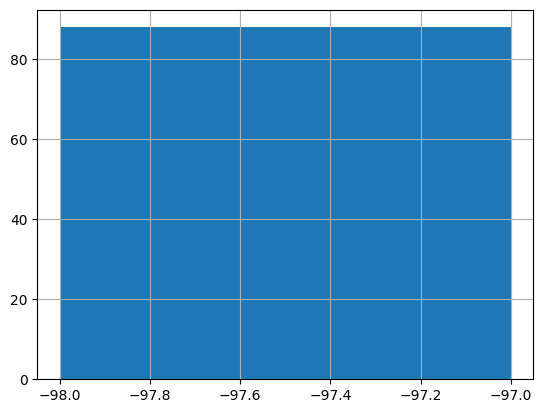

In [ ]:
n=20
disc=KBinsDiscretizer(n_bins=n,encode='ordinal',strategy='kmeans')   # Hacemos 8 grupos enumerados de 0 a 7
df_lluvias['Posicion']=disc.fit_transform(df_lluvias[['LON']])

# Get the actual number of unique bins created by the discretizer
actual_bins = int(df_lluvias['Posicion'].max()) + 1

for i in range(actual_bins):
  plt.figure()
  df_lluvias.groupby('Posicion')['LON'].get_group(i).hist(bins='auto')

Todo esto se realiza en un area de GDL al centro del País.

Text(33.972222222222214, 0.5, 'Latitud')

<Figure size 640x480 with 0 Axes>

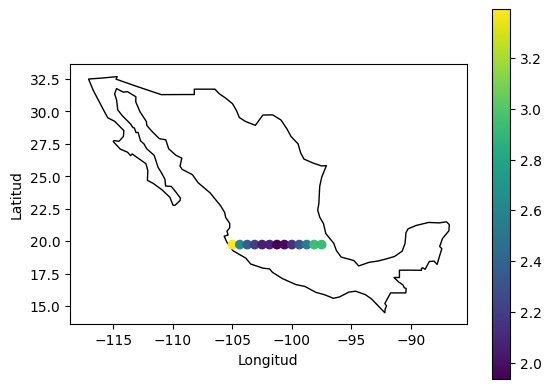

In [ ]:
lon=df_lluvias.groupby('Posicion')['LON'].mean()
lat=df_lluvias.groupby('Posicion')['LAT'].mean()
# Mapa de México
# https://www.naturalearthdata.com/downloads/110m-cultural-vectors/
file_shp=ruta+'ne_110m_admin_0_countries.shp'
world=gpd.read_file(file_shp)
mexico=world[world.ABBREV=='Mex.']
#
# Visualización de los resultados
fig=plt.figure()
mexico.plot(color='white', edgecolor='black')
plt.scatter(lon,lat,c=df_lluvias.groupby('Posicion')['ANN'].mean())
plt.colorbar()
plt.xlabel('Longitud')
plt.ylabel('Latitud')

In [ ]:
posicion=df_lluvias['Posicion'].value_counts(normalize=True)
posicion

,proportion
Posicion,
8.0,0.076923
7.0,0.076923
6.0,0.076923
5.0,0.076923
4.0,0.076923
3.0,0.076923
2.0,0.076923
1.0,0.076923
0.0,0.076923


In [ ]:
np.random.choice(posicion.index,p=posicion.values)

np.float64(6.0)

<Axes: >

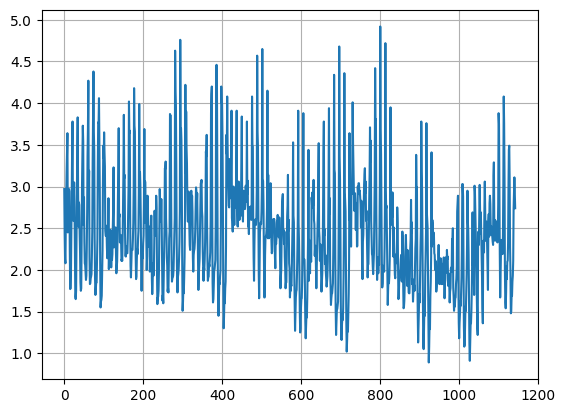

In [ ]:
df_lluvias['ANN'].plot(grid=True)

In [ ]:
medias=df_lluvias.groupby('Posicion')['ANN'].mean()
medias

,ANN
Posicion,
0.0,3.392159
1.0,2.635909
2.0,2.363977
3.0,2.196250
4.0,2.062614
5.0,2.072727
6.0,1.935341
7.0,1.976477
8.0,2.140455


In [ ]:
stds=df_lluvias.groupby('Posicion')['ANN'].std()
stds

,ANN
Posicion,
0.0,0.801574
1.0,0.469589
2.0,0.363570
3.0,0.362489
4.0,0.437005
5.0,0.475657
6.0,0.418401
7.0,0.483643
8.0,0.555675


In [ ]:
def simulacion_lluvias(posicion,medias,stds,N_escenarios):
  posicion_sim=np.random.choice(posicion.index,p=posicion.values,size=N_escenarios)
  # Get the mean and standard deviation for each simulated position
  loc_values = medias.loc[posicion_sim].values
  scale_values = stds.loc[posicion_sim].values
  # Generate rainfall values from a normal distribution using the specific means and stds
  lluvia_sim=np.random.normal(loc=loc_values, scale=scale_values, size=N_escenarios)
  return posicion_sim,lluvia_sim

In [ ]:
simulacion_lluvias(posicion,medias,stds,10)

(array([ 6., 12.,  6.,  3.,  2., 12., 11., 10.,  0.,  7.]),
 array([1.33107167, 2.58371588, 2.13471752, 2.78416288, 2.43585974,
        3.5395997 , 3.56832986, 2.27148985, 4.43512745, 1.47562926]))

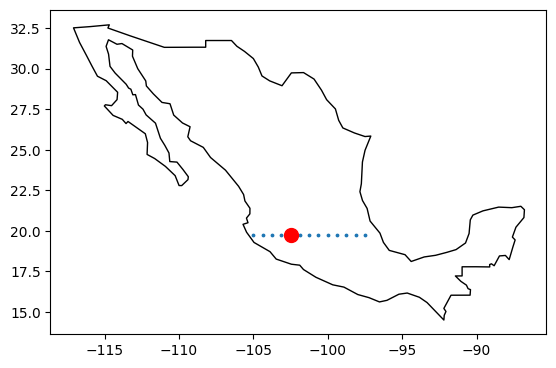

In [ ]:
mexico.plot(color='white', edgecolor='black')
plt.scatter(lon,lat,s=3)
plt.scatter(lon[4],lat[4],s=100,color='red')

In [ ]:
pos_sim,mag_sim=simulacion_lluvias(posicion,medias,stds,int(1E6)) #! millón de escenarios
B=(pos_sim==4)
B.mean()

np.float64(0.076651)

In [ ]:
lon[4],lat[4]

(np.float64(-102.5), np.float64(19.75))

La probabilidad que llueve con un millón de escenarios en la posición 4 la cual es cerca de GDL es de 7.73%

Text(33.972222222222214, 0.5, 'Latitud')

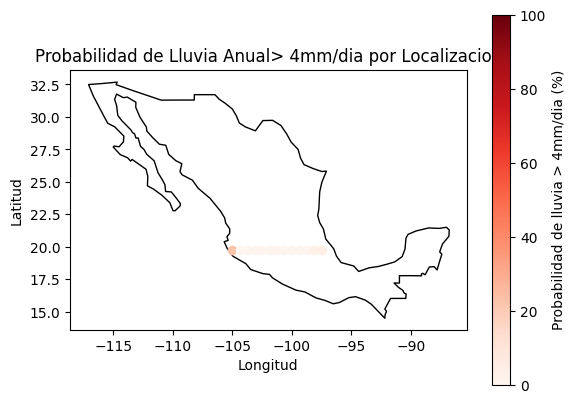

In [ ]:
B_per_posicion = pd.DataFrame({'posicion': pos_sim, 'mag_sim': mag_sim})
probability_per_posicion = B_per_posicion[B_per_posicion['mag_sim'] > 4].groupby('posicion').size() / B_per_posicion.groupby('posicion').size()
probability_per_posicion = probability_per_posicion.fillna(0) # Fill NaN if no rain > 4 in a position

mexico.plot(color='white', edgecolor='black')
for i in range(actual_bins):
  prob = probability_per_posicion.get(i, 0) * 100
  plt.scatter(lon[i], lat[i], c=prob, cmap='Reds', vmin=0, vmax=100) # Use Red colormap for probabilities
plt.colorbar(label='Probabilidad de lluvia > 4mm/dia (%)')
plt.title('Probabilidad de Lluvia Anual> 4mm/dia por Localizacion')
plt.xlabel('Longitud')
plt.ylabel('Latitud')